In [89]:
import requests
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import ast
from scipy import stats


In [2]:
API_KEY = "ced2fc8ea193b30272c2e6e516ebebee"  # replace with your own key
BASE_URL = "https://api.themoviedb.org/3"

# 4. Extract First Page of Popular Movies
url = f"{BASE_URL}/movie/top_rated?api_key={API_KEY}&language=en-US&page=1"
response = requests.get('https://api.themoviedb.org/3/movie/top_rated?api_key=ced2fc8ea193b30272c2e6e516ebebee&language=en-US&page=1')
response

<Response [200]>

In [3]:
print(url)

https://api.themoviedb.org/3/movie/top_rated?api_key=ced2fc8ea193b30272c2e6e516ebebee&language=en-US&page=1


In [ ]:
#id, title, release_date, vote_average, vote_count, popularity, original_language, overview

In [4]:
response.json()['results']

[{'adult': False,
  'backdrop_path': '/v8xVDqt8uCul3c3mgx4VpGCwxJC.jpg',
  'genre_ids': [18, 80],
  'id': 278,
  'original_language': 'en',
  'original_title': 'The Shawshank Redemption',
  'overview': 'Imprisoned in the 1940s for the double murder of his wife and her lover, upstanding banker Andy Dufresne begins a new life at the Shawshank prison, where he puts his accounting skills to work for an amoral warden. During his long stretch in prison, Dufresne comes to be admired by the other inmates -- including an older prisoner named Red -- for his integrity and unquenchable sense of hope.',
  'popularity': 26.7193,
  'poster_path': '/9cqNxx0GxF0bflZmeSMuL5tnGzr.jpg',
  'release_date': '1994-09-23',
  'title': 'The Shawshank Redemption',
  'video': False,
  'vote_average': 8.711,
  'vote_count': 29152},
 {'adult': False,
  'backdrop_path': '/jdHsptJbtalEuVhCV5i7kSC3g0x.jpg',
  'genre_ids': [18, 80],
  'id': 238,
  'original_language': 'en',
  'original_title': 'The Godfather',
  'overvi

In [5]:
g=pd.DataFrame(response.json()['results'])
g

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count
0,False,/v8xVDqt8uCul3c3mgx4VpGCwxJC.jpg,"[18, 80]",278,en,The Shawshank Redemption,Imprisoned in the 1940s for the double murder ...,26.7193,/9cqNxx0GxF0bflZmeSMuL5tnGzr.jpg,1994-09-23,The Shawshank Redemption,False,8.711,29152
1,False,/jdHsptJbtalEuVhCV5i7kSC3g0x.jpg,"[18, 80]",238,en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",31.8334,/3bhkrj58Vtu7enYsRolD1fZdja1.jpg,1972-03-14,The Godfather,False,8.685,22020
2,False,/kGzFbGhp99zva6oZODW5atUtnqi.jpg,"[18, 80]",240,en,The Godfather Part II,In the continuing saga of the Corleone crime f...,11.9876,/hek3koDUyRQk7FIhPXsa6mT2Zc3.jpg,1974-12-20,The Godfather Part II,False,8.571,13306
3,False,/zb6fM1CX41D9rF9hdgclu0peUmy.jpg,"[18, 36, 10752]",424,en,Schindler's List,The true story of how businessman Oskar Schind...,10.6784,/sF1U4EUQS8YHUYjNl3pMGNIQyr0.jpg,1993-12-15,Schindler's List,False,8.566,16833
4,False,/tj6iPnz18hGfr0LKqWmG6Cp3niO.jpg,[18],389,en,12 Angry Men,The defense and the prosecution have rested an...,8.9634,/ow3wq89wM8qd5X7hWKxiRfsFf9C.jpg,1957-04-10,12 Angry Men,False,8.548,9500
5,False,/ukfI9QkU1aIhOhKXYWE9n3z1mFR.jpg,"[16, 10751, 14]",129,ja,千と千尋の神隠し,"A young girl, Chihiro, becomes trapped in a st...",16.6165,/39wmItIWsg5sZMyRUHLkWBcuVCM.jpg,2001-07-20,Spirited Away,False,8.535,17605
6,False,/enNubozHn9pXi0ycTVYUWfpHZm.jpg,"[18, 28, 80, 53]",155,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,32.3335,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,2008-07-16,The Dark Knight,False,8.524,34647
7,False,/zQDFHYNVVVp9OAYSixYAG1SyX1l.jpg,"[35, 18, 10749]",19404,hi,दिलवाले दुल्हनिया ले जायेंगे,"Raj is a rich, carefree, happy-go-lucky second...",8.3532,/2CAL2433ZeIihfX1Hb2139CX0pW.jpg,1995-10-20,Dilwale Dulhania Le Jayenge,False,8.500,4518
8,False,/b6HWTOxn1xevvyHU2K9ICvaRU6g.jpg,"[14, 18, 80]",497,en,The Green Mile,A supernatural tale set on death row in a Sout...,13.2181,/o0lO84GI7qrG6XFvtsPOSV7CTNa.jpg,1999-12-10,The Green Mile,False,8.502,18510
9,False,/hiKmpZMGZsrkA3cdce8a7Dpos1j.jpg,"[35, 53, 18]",496243,ko,기생충,"All unemployed, Ki-taek's family takes peculia...",16.2253,/7IiTTgloJzvGI1TAYymCfbfl3vT.jpg,2019-05-30,Parasite,False,8.497,19664


In [6]:
g.columns.value_counts().sum()

14

In [7]:
df=pd.DataFrame()

In [8]:
df

""


In [ ]:
# for i in range(1,1001):
#     response=requests.get('https://api.themoviedb.org/3/movie/top_rated?api_key=ced2fc8ea193b30272c2e6e516ebebee&language=en-US&page={}'.format(i))
#     temp_df=pd.DataFrame(response.json()['results'])[['id','title','release_date','vote_average','vote_count','popularity','original_language','overview']]
#     df=df.append(temp_df,ignore_index=True)

In [9]:
import requests
import pandas as pd

all_dfs = []  # List to collect DataFrames

for i in range(1, 150):
    response = requests.get(
        f'https://api.themoviedb.org/3/movie/top_rated?api_key=ced2fc8ea193b30272c2e6e516ebebee&language=en-US&page={i}'
    )
    data = response.json().get('results', [])
    if data:  # Ensure data is not empty
        temp_df = pd.DataFrame(data)[[
             'title', 'release_date', 'vote_average','original_title','genre_ids',
            'vote_count', 'popularity', 'original_language', 'overview'
        ]]
        all_dfs.append(temp_df)

# Concatenate all collected DataFrames
df = pd.concat(all_dfs, ignore_index=True)



In [10]:
df

,title,release_date,vote_average,original_title,genre_ids,vote_count,popularity,original_language,overview
0,The Shawshank Redemption,1994-09-23,8.711,The Shawshank Redemption,"[18, 80]",29152,26.7193,en,Imprisoned in the 1940s for the double murder ...
1,The Godfather,1972-03-14,8.685,The Godfather,"[18, 80]",22020,31.8334,en,"Spanning the years 1945 to 1955, a chronicle o..."
2,The Godfather Part II,1974-12-20,8.571,The Godfather Part II,"[18, 80]",13306,11.9876,en,In the continuing saga of the Corleone crime f...
3,Schindler's List,1993-12-15,8.566,Schindler's List,"[18, 36, 10752]",16833,10.6784,en,The true story of how businessman Oskar Schind...
4,12 Angry Men,1957-04-10,8.548,12 Angry Men,[18],9500,8.9634,en,The defense and the prosecution have rested an...
...,...,...,...,...,...,...,...,...,...
2975,Gia,1998-01-31,7.102,Gia,"[10749, 18]",790,3.4475,en,Gia Carangi meteorically rises to modeling fam...
2976,The Negotiator,1998-07-29,7.102,The Negotiator,"[28, 80, 18, 53]",2248,5.6224,en,The police try to arrest expert hostage negoti...
2977,Phineas and Ferb The Movie: Across the 2nd Dim...,2011-08-05,7.100,Phineas and Ferb The Movie: Across the 2nd Dim...,"[16, 35, 10751, 10770, 878, 12, 28]",586,3.7010,en,Phineas and Ferb get trapped in an alternate d...
2978,Heartbeats,2010-06-11,7.101,Les amours imaginaires,"[18, 10749]",1031,2.1493,fr,"Francis is a young gay man, Marie is a young s..."


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2980 entries, 0 to 2979
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              2980 non-null   object 
 1   release_date       2980 non-null   object 
 2   vote_average       2980 non-null   float64
 3   original_title     2980 non-null   object 
 4   genre_ids          2980 non-null   object 
 5   vote_count         2980 non-null   int64  
 6   popularity         2980 non-null   float64
 7   original_language  2980 non-null   object 
 8   overview           2980 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 209.7+ KB


In [12]:
df.isnull().sum()

title                0
release_date         0
vote_average         0
original_title       0
genre_ids            0
vote_count           0
popularity           0
original_language    0
overview             0
dtype: int64

In [ ]:
# Column	Type	Why It’s Useful
# id	Integer	Unique identifier (for merging or reference).
# title	String	For movie identification & word clouds.
# release_date	Date	Extract year → trend analysis over time.
# vote_average	Float	Main measure of movie quality.
# vote_count	Integer	Indicates popularity or exposure.
# popularity	Float	TMDB algorithmic metric — compare with votes.
# original_language	Categorical	Analyze language-based movie trends.
# genre_ids / genres	List / String	Group by genres to find best-performing types.
# overview	Text	Word cloud or sentiment analysis.
# runtime (optional)	Numeric	Relation between length and rating.
# revenue / budget (optional)	Numeric	Analyze financial success vs. ratings.
# production_countries (optional)	Categorical	Compare trends by country.

In [13]:
df.columns

Index(['title', 'release_date', 'vote_average', 'original_title', 'genre_ids',
       'vote_count', 'popularity', 'original_language', 'overview'],
      dtype='object')

In [14]:
df.to_csv("tmdb_movies.csv")

In [15]:
df1 = pd.read_csv("tmdb_movies.csv")
df1

,Unnamed: 0,title,release_date,vote_average,original_title,genre_ids,vote_count,popularity,original_language,overview
0,0,The Shawshank Redemption,1994-09-23,8.711,The Shawshank Redemption,"[18, 80]",29152,26.7193,en,Imprisoned in the 1940s for the double murder ...
1,1,The Godfather,1972-03-14,8.685,The Godfather,"[18, 80]",22020,31.8334,en,"Spanning the years 1945 to 1955, a chronicle o..."
2,2,The Godfather Part II,1974-12-20,8.571,The Godfather Part II,"[18, 80]",13306,11.9876,en,In the continuing saga of the Corleone crime f...
3,3,Schindler's List,1993-12-15,8.566,Schindler's List,"[18, 36, 10752]",16833,10.6784,en,The true story of how businessman Oskar Schind...
4,4,12 Angry Men,1957-04-10,8.548,12 Angry Men,[18],9500,8.9634,en,The defense and the prosecution have rested an...
...,...,...,...,...,...,...,...,...,...,...
2975,2975,Gia,1998-01-31,7.102,Gia,"[10749, 18]",790,3.4475,en,Gia Carangi meteorically rises to modeling fam...
2976,2976,The Negotiator,1998-07-29,7.102,The Negotiator,"[28, 80, 18, 53]",2248,5.6224,en,The police try to arrest expert hostage negoti...
2977,2977,Phineas and Ferb The Movie: Across the 2nd Dim...,2011-08-05,7.100,Phineas and Ferb The Movie: Across the 2nd Dim...,"[16, 35, 10751, 10770, 878, 12, 28]",586,3.7010,en,Phineas and Ferb get trapped in an alternate d...
2978,2978,Heartbeats,2010-06-11,7.101,Les amours imaginaires,"[18, 10749]",1031,2.1493,fr,"Francis is a young gay man, Marie is a young s..."


# CLEANING DATA SET

In [16]:
df.columns.value_counts().sum()

9

In [17]:
df.head()

,title,release_date,vote_average,original_title,genre_ids,vote_count,popularity,original_language,overview
0,The Shawshank Redemption,1994-09-23,8.711,The Shawshank Redemption,"[18, 80]",29152,26.7193,en,Imprisoned in the 1940s for the double murder ...
1,The Godfather,1972-03-14,8.685,The Godfather,"[18, 80]",22020,31.8334,en,"Spanning the years 1945 to 1955, a chronicle o..."
2,The Godfather Part II,1974-12-20,8.571,The Godfather Part II,"[18, 80]",13306,11.9876,en,In the continuing saga of the Corleone crime f...
3,Schindler's List,1993-12-15,8.566,Schindler's List,"[18, 36, 10752]",16833,10.6784,en,The true story of how businessman Oskar Schind...
4,12 Angry Men,1957-04-10,8.548,12 Angry Men,[18],9500,8.9634,en,The defense and the prosecution have rested an...


In [18]:
df.tail()

,title,release_date,vote_average,original_title,genre_ids,vote_count,popularity,original_language,overview
2975,Gia,1998-01-31,7.102,Gia,"[10749, 18]",790,3.4475,en,Gia Carangi meteorically rises to modeling fam...
2976,The Negotiator,1998-07-29,7.102,The Negotiator,"[28, 80, 18, 53]",2248,5.6224,en,The police try to arrest expert hostage negoti...
2977,Phineas and Ferb The Movie: Across the 2nd Dim...,2011-08-05,7.100,Phineas and Ferb The Movie: Across the 2nd Dim...,"[16, 35, 10751, 10770, 878, 12, 28]",586,3.7010,en,Phineas and Ferb get trapped in an alternate d...
2978,Heartbeats,2010-06-11,7.101,Les amours imaginaires,"[18, 10749]",1031,2.1493,fr,"Francis is a young gay man, Marie is a young s..."
2979,Naruto the Movie: Guardians of the Crescent Mo...,2006-08-05,7.100,劇場版 NARUTO -ナルト- 大興奮!みかづき島のアニマル騒動だってばよ,"[12, 16, 28]",468,3.5800,ja,"Naruto Uzumaki, Kakashi Hatake, Sakura Haruno,..."


In [19]:
df.sample(5)

,title,release_date,vote_average,original_title,genre_ids,vote_count,popularity,original_language,overview
1379,The Man Who Would Be King,1975-12-03,7.500,The Man Who Would Be King,"[12, 18]",676,2.2044,en,"Tired of life as soldiers, Peachy Carnehan and..."
2675,Marathon Man,1976-10-08,7.169,Marathon Man,"[53, 80, 18, 28]",1157,2.3055,en,A graduate student and obsessive runner in New...
2527,Conclave,2024-10-25,7.202,Conclave,"[18, 53]",2992,9.1492,en,"After the unexpected death of the Pope, Cardin..."
844,Boys,2014-01-08,7.676,Jongens,"[18, 10749, 10770]",716,2.9876,nl,Two teen track stars discover first love as th...
1020,Toy Story 2,1999-10-30,7.600,Toy Story 2,"[16, 35, 10751]",14445,12.0879,en,"Andy heads off to Cowboy Camp, leaving his toy..."


In [20]:
df.describe(include ='all')

,title,release_date,vote_average,original_title,genre_ids,vote_count,popularity,original_language,overview
count,2980,2980,2980.000000,2980,2980,2980.000000,2980.000000,2980,2980
unique,2942,2586,NaN,2953,956,NaN,NaN,41,2979
top,Les Misérables,2021-02-12,NaN,Les Misérables,[18],NaN,NaN,en,Humbert Humbert is a middle-aged British novel...
freq,3,6,NaN,3,324,NaN,NaN,1934,2
mean,NaN,NaN,7.522869,NaN,NaN,3206.411409,5.937514,NaN,NaN
std,NaN,NaN,0.319158,NaN,NaN,4855.598685,8.235681,NaN,NaN
min,NaN,NaN,7.100000,NaN,NaN,300.000000,0.006200,NaN,NaN
25%,NaN,NaN,7.272000,NaN,NaN,553.000000,2.644800,NaN,NaN
50%,NaN,NaN,7.450500,NaN,NaN,1158.500000,4.046200,NaN,NaN
75%,NaN,NaN,7.717250,NaN,NaN,3475.250000,6.402575,NaN,NaN


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2980 entries, 0 to 2979
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              2980 non-null   object 
 1   release_date       2980 non-null   object 
 2   vote_average       2980 non-null   float64
 3   original_title     2980 non-null   object 
 4   genre_ids          2980 non-null   object 
 5   vote_count         2980 non-null   int64  
 6   popularity         2980 non-null   float64
 7   original_language  2980 non-null   object 
 8   overview           2980 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 209.7+ KB


In [22]:
df.shape

(2980, 9)

In [25]:
df.isnull().sum()

title                0
release_date         0
vote_average         0
original_title       0
genre_ids            0
vote_count           0
popularity           0
original_language    0
overview             0
dtype: int64

In [33]:
# Convert all list entries to tuple for this column
df['genre_ids'] = df['genre_ids'].apply(lambda x: tuple(x) if isinstance(x, list) else x)

# Now duplicated() or factorize() will work
duplicates = df.duplicated()
duplicates


0       False
1       False
2       False
3       False
4       False
        ...  
2975    False
2976    False
2977    False
2978    False
2979    False
Length: 2980, dtype: bool

In [34]:
df.duplicated().sum()

0

In [42]:
df.columns

Index(['title', 'release_date', 'vote_average', 'original_title', 'genre_ids',
       'vote_count', 'popularity', 'original_language', 'overview'],
      dtype='object')

In [43]:
# df.drop(columns = ['Unnamed : 0'],inplace = True) 

In [44]:
df['release_date'] = pd.to_datetime(df['release_date'],errors = 'coerce')
df['release_year'] = df['release_date'].dt.year
df['release_date'].fillna(pd.Timestamp('1900-01-01'),inplace = True)

In [45]:
df

,title,release_date,vote_average,original_title,genre_ids,vote_count,popularity,original_language,overview,release_year
0,The Shawshank Redemption,1994-09-23,8.711,The Shawshank Redemption,"(18, 80)",29152,26.7193,en,Imprisoned in the 1940s for the double murder ...,1994
1,The Godfather,1972-03-14,8.685,The Godfather,"(18, 80)",22020,31.8334,en,"Spanning the years 1945 to 1955, a chronicle o...",1972
2,The Godfather Part II,1974-12-20,8.571,The Godfather Part II,"(18, 80)",13306,11.9876,en,In the continuing saga of the Corleone crime f...,1974
3,Schindler's List,1993-12-15,8.566,Schindler's List,"(18, 36, 10752)",16833,10.6784,en,The true story of how businessman Oskar Schind...,1993
4,12 Angry Men,1957-04-10,8.548,12 Angry Men,"(18,)",9500,8.9634,en,The defense and the prosecution have rested an...,1957
...,...,...,...,...,...,...,...,...,...,...
2975,Gia,1998-01-31,7.102,Gia,"(10749, 18)",790,3.4475,en,Gia Carangi meteorically rises to modeling fam...,1998
2976,The Negotiator,1998-07-29,7.102,The Negotiator,"(28, 80, 18, 53)",2248,5.6224,en,The police try to arrest expert hostage negoti...,1998
2977,Phineas and Ferb The Movie: Across the 2nd Dim...,2011-08-05,7.100,Phineas and Ferb The Movie: Across the 2nd Dim...,"(16, 35, 10751, 10770, 878, 12, 28)",586,3.7010,en,Phineas and Ferb get trapped in an alternate d...,2011
2978,Heartbeats,2010-06-11,7.101,Les amours imaginaires,"(18, 10749)",1031,2.1493,fr,"Francis is a young gay man, Marie is a young s...",2010


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2980 entries, 0 to 2979
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              2980 non-null   object        
 1   release_date       2980 non-null   datetime64[ns]
 2   vote_average       2980 non-null   float64       
 3   original_title     2980 non-null   object        
 4   genre_ids          2980 non-null   object        
 5   vote_count         2980 non-null   int64         
 6   popularity         2980 non-null   float64       
 7   original_language  2980 non-null   object        
 8   overview           2980 non-null   object        
 9   release_year       2980 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(5)
memory usage: 221.3+ KB


# Converting genre id to genre name

In [47]:
df['genre_ids'].dtype

dtype('O')

In [73]:
df['genre_ids'].head().apply(type)

0    <class 'list'>
1    <class 'list'>
2    <class 'list'>
3    <class 'list'>
4    <class 'list'>
Name: genre_ids, dtype: object

In [76]:
genre_map = {
    28: "Action",
    12: "Adventure",
    16: "Animation",
    35: "Comedy",
    80: "Crime",
    99: "Documentary",
    18: "Drama",
    10751: "Family",
    14: "Fantasy",
    36: "History",
    27: "Horror",
    10402: "Music",
    9648: "Mystery",
    10749: "Romance",
    878: "Science Fiction",
    10770: "TV Movie",
    53: "Thriller",
    10752: "War",
    37: "Western"
}

In [78]:
df["genres"] = df["genre_ids"].apply(
    lambda lst: [genre_map.get(g, "Unknown") for g in lst]
)


In [82]:
print(df['genres'])

0                                          [Drama, Crime]
1                                          [Drama, Crime]
2                                          [Drama, Crime]
3                                   [Drama, History, War]
4                                                 [Drama]
                              ...                        
2975                                     [Romance, Drama]
2976                     [Action, Crime, Drama, Thriller]
2977    [Animation, Comedy, Family, TV Movie, Science ...
2978                                     [Drama, Romance]
2979                       [Adventure, Animation, Action]
Name: genres, Length: 2980, dtype: object


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2980 entries, 0 to 2979
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              2980 non-null   object        
 1   release_date       2980 non-null   datetime64[ns]
 2   vote_average       2980 non-null   float64       
 3   original_title     2980 non-null   object        
 4   genre_ids          2980 non-null   object        
 5   vote_count         2980 non-null   int64         
 6   popularity         2980 non-null   float64       
 7   original_language  2980 non-null   object        
 8   overview           2980 non-null   object        
 9   release_year       2980 non-null   int32         
 10  genre_ids_list     2980 non-null   object        
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(6)
memory usage: 244.6+ KB


In [85]:
df.explode('genres')

,title,release_date,vote_average,original_title,genre_ids,vote_count,popularity,original_language,overview,release_year,genres
0,The Shawshank Redemption,1994-09-23,8.711,The Shawshank Redemption,"[18, 80]",29152,26.7193,en,Imprisoned in the 1940s for the double murder ...,1994,Drama
0,The Shawshank Redemption,1994-09-23,8.711,The Shawshank Redemption,"[18, 80]",29152,26.7193,en,Imprisoned in the 1940s for the double murder ...,1994,Crime
1,The Godfather,1972-03-14,8.685,The Godfather,"[18, 80]",22020,31.8334,en,"Spanning the years 1945 to 1955, a chronicle o...",1972,Drama
1,The Godfather,1972-03-14,8.685,The Godfather,"[18, 80]",22020,31.8334,en,"Spanning the years 1945 to 1955, a chronicle o...",1972,Crime
2,The Godfather Part II,1974-12-20,8.571,The Godfather Part II,"[18, 80]",13306,11.9876,en,In the continuing saga of the Corleone crime f...,1974,Drama
...,...,...,...,...,...,...,...,...,...,...,...
2978,Heartbeats,2010-06-11,7.101,Les amours imaginaires,"[18, 10749]",1031,2.1493,fr,"Francis is a young gay man, Marie is a young s...",2010,Drama
2978,Heartbeats,2010-06-11,7.101,Les amours imaginaires,"[18, 10749]",1031,2.1493,fr,"Francis is a young gay man, Marie is a young s...",2010,Romance
2979,Naruto the Movie: Guardians of the Crescent Mo...,2006-08-05,7.100,劇場版 NARUTO -ナルト- 大興奮!みかづき島のアニマル騒動だってばよ,"[12, 16, 28]",468,3.5800,ja,"Naruto Uzumaki, Kakashi Hatake, Sakura Haruno,...",2006,Adventure
2979,Naruto the Movie: Guardians of the Crescent Mo...,2006-08-05,7.100,劇場版 NARUTO -ナルト- 大興奮!みかづき島のアニマル騒動だってばよ,"[12, 16, 28]",468,3.5800,ja,"Naruto Uzumaki, Kakashi Hatake, Sakura Haruno,...",2006,Animation


In [39]:
df['title'] = df['title'].str.strip().replace(" ",np.nan)
df['title'].fillna("Unknown Title",inplace = True)

In [75]:
df.columns

Index(['title', 'release_date', 'vote_average', 'original_title', 'genre_ids',
       'vote_count', 'popularity', 'original_language', 'overview',
       'release_year'],
      dtype='object')

In [100]:
df['vote_average'] = pd.to_numeric(df['vote_average'],errors ='coerce')
df['vote_average'].fillna(df['vote_average'].median(),inplace = True)


In [99]:
df['vote_count'] = pd.to_numeric(df['vote_count'], errors='coerce')
df['vote_count'].fillna(df['vote_count'].median(), inplace=True)

In [107]:
df['original_language'] = df['original_language'].fillna('unknown')
df['original_language'] = (
    df['original_language']           
      .fillna('unknown')              
      .astype(str)                    
      .str.strip()                    
      .replace('', 'unknown')         
      .str.lower()                   
)



In [110]:
# Mapping for common language codes
language_map = {
    'en': 'English',
    'fr': 'French',
    'ja': 'Japanese',
    'es': 'Spanish',
    'de': 'German',
    'zh': 'Chinese',
    'it': 'Italian',
    'ko': 'Korean',
    'hi': 'Hindi',
    'ru': 'Russian',
    'pt': 'Portuguese',
    # Add more codes as needed
}

# Function to map codes to names, 'Unknown' if not mapped
def map_language(code):
    return language_map.get(code, 'Unknown')

# Apply this to the DataFrame column
df['original_language_name'] = df['original_language'].apply(map_language)

,title,release_date,vote_average,original_title,genre_ids,vote_count,popularity,original_language,overview,release_year,genres,overview_length,original_language_name
12,Your Name.,2016-08-26,8.479,君の名は。,"[16, 10749, 18]",12072,17.1964,ja,High schoolers Mitsuha and Taki are complete s...,2016,"[Animation, Romance, Drama]",279,Japanese
16,GoodFellas,1990-09-12,8.453,GoodFellas,"[18, 80]",13748,11.5322,en,"The true story of Henry Hill, a half-Irish, ha...",1990,"[Drama, Crime]",203,English
17,Seven Samurai,1954-04-26,8.451,七人の侍,"[28, 18]",4017,8.4319,ja,A samurai answers a village's request for prot...,1954,"[Action, Drama]",261,Japanese
18,Grave of the Fireflies,1988-04-16,8.447,火垂るの墓,"[16, 18, 10752]",6177,0.0110,ja,"In the final months of World War II, 14-year-o...",1988,"[Animation, Drama, War]",337,Japanese
19,Life Is Beautiful,1997-12-20,8.440,La vita è bella,"[35, 18]",13611,8.2543,it,A touching story of an Italian book seller of ...,1997,"[Comedy, Drama]",320,Italian
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2975,Gia,1998-01-31,7.102,Gia,"[10749, 18]",790,3.4475,en,Gia Carangi meteorically rises to modeling fam...,1998,"[Romance, Drama]",135,English
2976,The Negotiator,1998-07-29,7.102,The Negotiator,"[28, 80, 18, 53]",2248,5.6224,en,The police try to arrest expert hostage negoti...,1998,"[Action, Crime, Drama, Thriller]",412,English
2977,Phineas and Ferb The Movie: Across the 2nd Dim...,2011-08-05,7.100,Phineas and Ferb The Movie: Across the 2nd Dim...,"[16, 35, 10751, 10770, 878, 12, 28]",586,3.7010,en,Phineas and Ferb get trapped in an alternate d...,2011,"[Animation, Comedy, Family, TV Movie, Science ...",226,English
2978,Heartbeats,2010-06-11,7.101,Les amours imaginaires,"[18, 10749]",1031,2.1493,fr,"Francis is a young gay man, Marie is a young s...",2010,"[Drama, Romance]",442,French


In [101]:
df['overview'] = df['overview'].str.strip().replace('', np.nan)
df['overview'].fillna('No overview available.', inplace=True)
df['overview_length'] = df['overview'].str.len()


In [104]:
df

,title,release_date,vote_average,original_title,genre_ids,vote_count,popularity,original_language,overview,release_year,genres,overview_length,original_language_name
12,Your Name.,2016-08-26,8.479,君の名は。,"[16, 10749, 18]",12072,17.1964,ja,High schoolers Mitsuha and Taki are complete s...,2016,"[Animation, Romance, Drama]",279,Japanese
16,GoodFellas,1990-09-12,8.453,GoodFellas,"[18, 80]",13748,11.5322,en,"The true story of Henry Hill, a half-Irish, ha...",1990,"[Drama, Crime]",203,English
17,Seven Samurai,1954-04-26,8.451,七人の侍,"[28, 18]",4017,8.4319,ja,A samurai answers a village's request for prot...,1954,"[Action, Drama]",261,Japanese
18,Grave of the Fireflies,1988-04-16,8.447,火垂るの墓,"[16, 18, 10752]",6177,0.0110,ja,"In the final months of World War II, 14-year-o...",1988,"[Animation, Drama, War]",337,Japanese
19,Life Is Beautiful,1997-12-20,8.440,La vita è bella,"[35, 18]",13611,8.2543,it,A touching story of an Italian book seller of ...,1997,"[Comedy, Drama]",320,Italian
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2975,Gia,1998-01-31,7.102,Gia,"[10749, 18]",790,3.4475,en,Gia Carangi meteorically rises to modeling fam...,1998,"[Romance, Drama]",135,English
2976,The Negotiator,1998-07-29,7.102,The Negotiator,"[28, 80, 18, 53]",2248,5.6224,en,The police try to arrest expert hostage negoti...,1998,"[Action, Crime, Drama, Thriller]",412,English
2977,Phineas and Ferb The Movie: Across the 2nd Dim...,2011-08-05,7.100,Phineas and Ferb The Movie: Across the 2nd Dim...,"[16, 35, 10751, 10770, 878, 12, 28]",586,3.7010,en,Phineas and Ferb get trapped in an alternate d...,2011,"[Animation, Comedy, Family, TV Movie, Science ...",226,English
2978,Heartbeats,2010-06-11,7.101,Les amours imaginaires,"[18, 10749]",1031,2.1493,fr,"Francis is a young gay man, Marie is a young s...",2010,"[Drama, Romance]",442,French


In [106]:
df.sample(5)

,title,release_date,vote_average,original_title,genre_ids,vote_count,popularity,original_language,overview,release_year,genres,overview_length,original_language_name
403,About Time,2013-09-04,7.910,About Time,"[18, 10749, 14]",8931,8.1508,en,The night after another unsatisfactory New Yea...,2013,"[Drama, Romance, Fantasy]",408,English
593,A Bag of Marbles,2017-01-18,7.803,Un sac de billes,"[10752, 18]",879,1.4065,fr,"At the beginning of the 1940s, in a France occ...",2017,"[War, Drama]",682,French
2004,Chemical Hearts,2020-08-21,7.320,Chemical Hearts,"[18, 10749]",1143,2.3848,en,When a hopelessly romantic high school senior ...,2020,"[Drama, Romance]",195,English
1196,Cure,1997-12-27,7.535,キュア,"[80, 53, 27, 9648]",693,6.7916,ja,A detective starts spiraling out of control wh...,1997,"[Crime, Thriller, Horror, Mystery]",139,Japanese
2537,The Lincoln Lawyer,2011-03-17,7.199,The Lincoln Lawyer,"[80, 18, 53]",3469,12.0893,en,Mick Haller is a charismatic defense attorney ...,2011,"[Crime, Drama, Thriller]",446,English


In [109]:
df.shape

(2883, 13)

In [113]:
# Replace 'column_name' with the target column
print(df['original_title'].duplicated().sum())


23


In [114]:
duplicate_summary = df.apply(lambda x: x.duplicated(keep=False).sum())
print(duplicate_summary)

title                       67
release_date               696
vote_average              2541
original_title              45
genre_ids                 2271
vote_count                1534
popularity                  76
original_language         2871
overview                     2
release_year              2879
genres                    2271
overview_length           2787
original_language_name    2883
dtype: int64


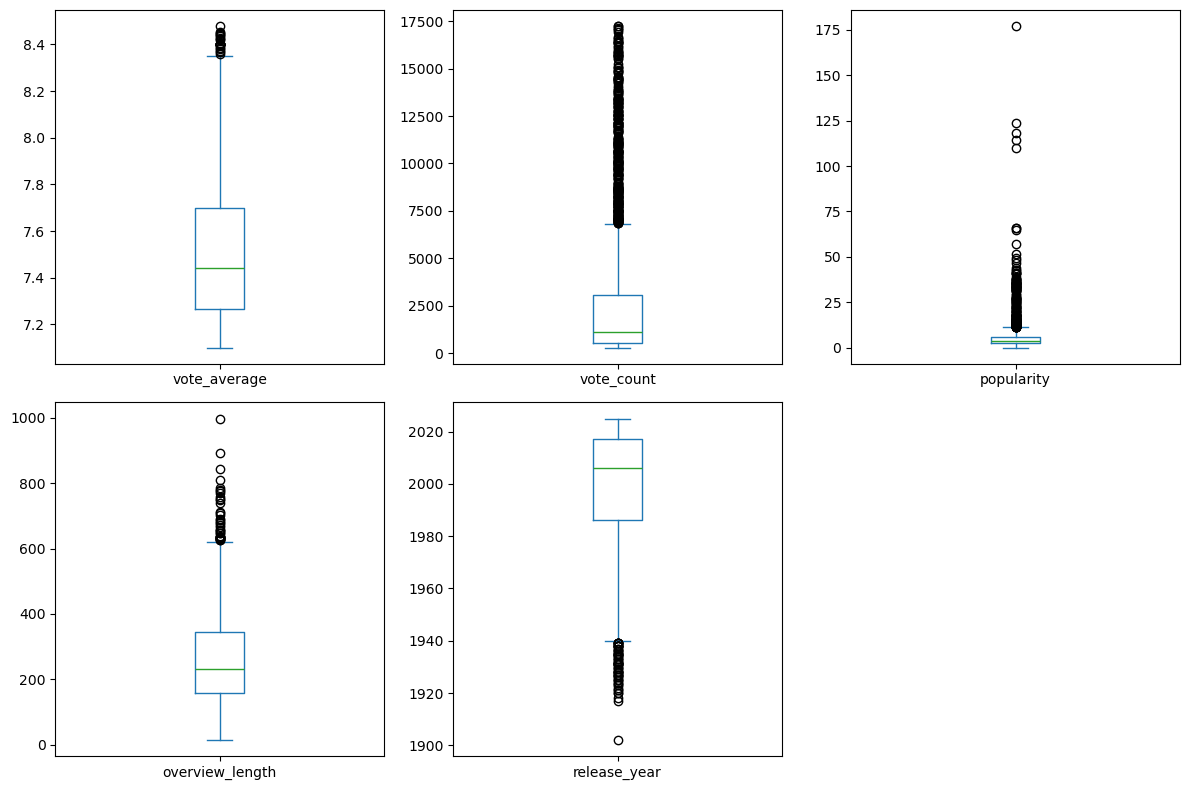

In [116]:
import matplotlib.pyplot as plt

# List your desired columns
cols = [
    'vote_average', 'vote_count', 'popularity', 'overview_length', 'release_year'
    # Add/remove columns here depending on what you want to visualize
]

# Create boxplots for all columns in one figure
df[cols].plot(kind='box', figsize=(12, 8), subplots=True, layout=(2, 3), sharex=False, sharey=False)

plt.tight_layout()
plt.show()
